### POP of LME with simplest Hamiltonian and dissipator

In [1]:
using DynamicPolynomials
using LinearAlgebra
include("LiPoSID.jl")

Main.LiPoSID

$
    \frac{d\rho}{dt} = -\frac{i}{\hbar} [H,\rho(t)] + \mathcal{D}[\rho(t)] = - \frac{i}{\hbar}[H, \rho]+\sum_{\ell=1}^{s-1}\left[A_\ell \rho A_\ell^\dagger - \frac{1}{2}\left\{ A_\ell^\dagger A_\ell, \rho \right\} \right]
$


$
    H = \begin{pmatrix} e_1 & d_1 + i d_2\\ d_1 - i d_2 & 0
   \end{pmatrix}
$


$
A = \begin{pmatrix} a_1 + i b_1 & a_2 + i b_2\\ a_3 + i b_3 & - a_1 - i b_1
   \end{pmatrix}$

In [2]:
using DynamicPolynomials

@polyvar eˢ[1:2]
@polyvar dˢ[1:2]

    Hˢʸᵐᵇ = [ eˢ[1]               dˢ[1] + im*dˢ[2]
              dˢ[1] - im*dˢ[2]     0.             ]


#    Hˢʸᵐᵇ = [ e[1]   0
#              0      0.]



@polyvar aˢ[1:4]
@polyvar bˢ[1:4]

    Aˢʸᵐᵇ = [ aˢ[1] + im*bˢ[1]           aˢ[2] + im*bˢ[2]
              aˢ[3] + im*bˢ[3]           aˢ[4] + im*bˢ[4]   ]

#    Aᵗʳᵃᶜᵉˡᵉˢˢ = [ a[1] + im*b[1]           a[2] + im*b[2]
#                   a[3] + im*b[3]          -a[1] - im*b[1]   ]


2×2 Matrix{Polynomial{true, Complex{Int64}}}:
 aˢ₁ + (0+1im)bˢ₁  aˢ₂ + (0+1im)bˢ₂
 aˢ₃ + (0+1im)bˢ₃  aˢ₄ + (0+1im)bˢ₄

In [3]:
parentdir = pwd()
data_dir = parentdir*"\\DATA\\"

"C:\\Users\\Zakhar\\Documents\\GitHub\\POP_fail\\DATA\\"

In [4]:
γᵗˣᵗ = "0.079477"

ρᵍ, tᵍ = LiPoSID.get_rho_series(data_dir*"State_B1_2CUT_data.h5", γᵗˣᵗ)
ρᵉ, tᵉ = LiPoSID.get_rho_series(data_dir*"State_B2_2CUT_data.h5", γᵗˣᵗ)
ρˣ, tˣ = LiPoSID.get_rho_series(data_dir*"State_B3_2CUT_data.h5", γᵗˣᵗ)
ρʸ, tʸ = LiPoSID.get_rho_series(data_dir*"State_B4_2CUT_data.h5", γᵗˣᵗ)


bˣ = LiPoSID.bloch(ρˣ)

@assert tᵍ == tᵉ == tˣ == tʸ 

t = convert(Vector{Float64}, tᵉ)
@assert maximum(diff(t)) ≈ minimum(diff(t)) ≈ t[2]-t[1]
Δt = t[2]-t[1]
t_steps = length(t)

1256

In [34]:
Δt

0.020000000000000004

$
 L^{(Lindblad)}
= \sum_{i=1}^N {
{\left\|
\rho_{(i)} - \rho_{(i-2)}
- {\mathcal{L}} \left[\int^{t_i}_{t_{i-2}}\rho(t)dt \right] \right\| }^2_F }
$

$
\int^{t_i}_{t_{i-2}}\rho(t)dt = \frac{1}{3} \Delta t \left[ {\rho(t_{i-2}) + 4 \rho(t_{i-1}) + \rho(t_i)} \right] +  \mathcal{O}(\Delta t^5). \label{eq:simpson}
$

In [5]:
obj_simp = 0

for ρ in [ρᵍ, ρᵉ, ρˣ, ρʸ]

    # Convert cut ρ series:
    ρ = convert(Vector{Matrix{ComplexF64}}, ρ)

    obj_simp += LiPoSID.simpson_obj(ρ, t,  Hˢʸᵐᵇ, [Aˢʸᵐᵇ])

end # of files (initial states) loop 


In [6]:
obj_simp;

In [7]:
solution_simp_n, best_method_simp_n = LiPoSID.sos_min_newton(obj_simp)

************************TSSOS************************
TSSOS is launching...
optimum = 0.0005505153724634764

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

The local solver failed!
No higher TSSOS hierarchy!
************************TSSOS************************
TSSOS is launching...
optimum = 0.0005503731385784542
Global optimality certified!
No higher TSSOS hierarchy!


(PolyVar{true}[eˢ₁, dˢ₁, dˢ₂, aˢ₁, aˢ₂, aˢ₃, aˢ₄, bˢ₁, bˢ₂, bˢ₃, bˢ₄] => [25.126034950031308, 0.16804665029537713, -0.05397218480827765, -0.047054048174052156, 0.2559692832578667, 0.059654215469317325, -0.04699070555168669, -1.0394632123795913, -0.14053323801326237, -0.02788144280712815, -1.0395029691580366], "scaled_tssos")

In [8]:
best_method_simp_n

"scaled_tssos"

In [9]:
Hⁿ = subs(Hˢʸᵐᵇ, solution_simp_n)

2×2 Matrix{Polynomial{true, ComplexF64}}:
 (25.126+0.0im)          (0.168047-0.0539722im)
 (0.168047+0.0539722im)  0.0+0.0im

In [10]:
Lⁿ = subs(Aˢʸᵐᵇ, solution_simp_n)

2×2 Matrix{Polynomial{true, ComplexF64}}:
 (-0.047054-1.03946im)    (0.255969-0.140533im)
 (0.0596542-0.0278814im)  (-0.0469907-1.0395im)

$L' = L + a I$

$\begin{pmatrix}
 L'_{11} &  L'_{12} \\
 L'_{21} &  L'_{22}
 \end{pmatrix} = 
 \begin{pmatrix}
 L_{11} &  L_{12} \\
 L_{21} &  L_{22}
 \end{pmatrix}
 +
 \begin{pmatrix}
 a/2 &  0 \\
 0 &  a/2
 \end{pmatrix}$

$\operatorname{tr}(L') = \operatorname{tr}(L) + \operatorname{tr}(aI) = 0$

$\begin{pmatrix}
 L'_{11} &  L'_{12} \\
 L'_{21} &  -L'_{11}
 \end{pmatrix} = 
 \begin{pmatrix}
 L_{11} &  L_{12} \\
 L_{21} &  L_{22}
 \end{pmatrix}
 +
 \begin{pmatrix}
 a/2 &  0 \\
 0 &  a/2
 \end{pmatrix}$
 
 $L'_{11} = L_{11} + a/2$
 
 $-L'_{11} = L_{22} + a/2$
 
 $L_{11} - L_{22} = 2 L'_{11}$


$\operatorname{tr}(L) = - \operatorname{tr}(aI)$

$2a = -\operatorname{tr}(L)$

$ a = -\operatorname{tr}(L)/2$

$ \Delta L = L'- L = -\frac{\operatorname{tr}(L)}{2} I$

$ H' = H + \frac{1}{2i} \gamma (a^*L - a L^\dagger)$

$\Delta H /\gamma = \frac{1}{2i} (a^*L - a L^\dagger)$

$\Delta H = H' - H = \frac{1}{2i} (a^*L - a L^\dagger)$

In [11]:
function fix_hamiltonian_and_dissipator(H, L)
    a = - tr(L)/2
    Lᶠⁱˣᵉᵈ = L + I * a
    Hᶠⁱˣᵉᵈ = H + (a' * L - a * L')/2im
    return Hᶠⁱˣᵉᵈ, Lᶠⁱˣᵉᵈ
end

fix_hamiltonian_and_dissipator (generic function with 1 method)

In [12]:
Hⁿᶠⁱˣ, Lⁿᶠⁱˣ = fix_hamiltonian_and_dissipator(Hⁿ, Lⁿ)

(Polynomial{true, ComplexF64}[(25.126068806552855 + 0.0im) (4.437601188894691e-5 - 3.796722822018567e-5im); (4.437601188894691e-5 + 3.796722822018567e-5im) (-3.3856521546381246e-5 - 0.0im)], Polynomial{true, ComplexF64}[(-3.1671311182736306e-5 + 1.9878389222682813e-5im) (0.30299166012073614 + 0.8989498527555516im); (0.10667659233218674 + 1.0116016479616858im) (3.167131118272937e-5 - 1.9878389222682813e-5im)])

In [13]:
println("γ = "*string(γᵗˣᵗ)*" POP Simpson: ")

solution_simp, best_method_simp = LiPoSID.sos_min(obj_simp) 

println(" Best method: ", best_method_simp)


γ = 0.079477 POP Simpson: 
************************TSSOS************************
TSSOS is launching...
optimum = 0.0005515073265340807
The local solver failed!
No higher TSSOS hierarchy!
************************TSSOS************************
TSSOS is launching...
optimum = 0.0005503918851214808
Global optimality certified!
No higher TSSOS hierarchy!
 Best method: scaled_tssos


In [14]:
Hˢⁱᵈ = subs(Hˢʸᵐᵇ, solution_simp)

2×2 Matrix{Polynomial{true, ComplexF64}}:
 (25.1259+0.0im)        (0.452076-0.108897im)
 (0.452076+0.108897im)  0.0+0.0im

In [15]:
Lˢⁱᵈ = subs(Aˢʸᵐᵇ, solution_simp)

2×2 Matrix{Polynomial{true, ComplexF64}}:
 (2.38517-1.21638im)      (0.213542+0.199173im)
 (0.0451408+0.0479406im)  (2.38522-1.21633im)

In [16]:
Hᶠⁱˣ, Lᶠⁱˣ = fix_hamiltonian_and_dissipator(Hˢⁱᵈ, Lˢⁱᵈ)

(Polynomial{true, ComplexF64}[(25.126011845195 + 0.0im) (4.4385957741921445e-5 - 3.8009764801158474e-5im); (4.4385957741921445e-5 + 3.8009764801158474e-5im) (-9.082068883259353e-5 - 0.0im)], Polynomial{true, ComplexF64}[(-2.8427319974877463e-5 - 2.358002197500042e-5im) (-2.1716526199142736 + 1.4155288395266652im); (-2.3400536928482594 + 1.264296854054779im) (2.8427319974877463e-5 + 2.3580021975222465e-5im)])

In [17]:
using QuantumOptics

basis = NLevelBasis(2)

function Lindblad_time_evolution(basis, ρ₀, time_span, H, J)
         
    ρ₀ = DenseOperator(basis, Hermitian(ρ₀)) 
    H = DenseOperator(basis, H) # reconstructed Hamiltonian of the system
    # H = DenseOperator(basis, convert(Matrix{ComplexF64}, H[:,:,1]) ) # !!!!!!
    J = [ DenseOperator(basis, Jᵢ) for Jᵢ in J ] # reconstracted Lindblad decipators
    
    time, ρ  = timeevolution.master(time_span, ρ₀, H, J)
    
    ρ = [ρₜ.data for ρₜ in ρ]

end

Lindblad_time_evolution (generic function with 1 method)

In [18]:
ρᵍₛᵢ = Lindblad_time_evolution(basis, ρᵍ[1], t, Hˢⁱᵈ, [Lˢⁱᵈ])
ρᵉₛᵢ = Lindblad_time_evolution(basis, ρᵉ[1], t, Hˢⁱᵈ, [Lˢⁱᵈ])
ρˣₛᵢ = Lindblad_time_evolution(basis, ρˣ[1], t, Hˢⁱᵈ, [Lˢⁱᵈ])
ρʸₛᵢ = Lindblad_time_evolution(basis, ρʸ[1], t, Hˢⁱᵈ, [Lˢⁱᵈ])

ρᵍₛᵢᶠⁱˣ = Lindblad_time_evolution(basis, ρᵍ[1], t, Hᶠⁱˣ, [Lᶠⁱˣ])
ρᵉₛᵢᶠⁱˣ = Lindblad_time_evolution(basis, ρᵉ[1], t, Hᶠⁱˣ, [Lᶠⁱˣ])
ρˣₛᵢᶠⁱˣ = Lindblad_time_evolution(basis, ρˣ[1], t, Hᶠⁱˣ, [Lᶠⁱˣ])
ρʸₛᵢᶠⁱˣ = Lindblad_time_evolution(basis, ρʸ[1], t, Hᶠⁱˣ, [Lᶠⁱˣ])

ρᵍₙ = Lindblad_time_evolution(basis, ρᵍ[1], t, Hⁿ, [Lⁿ])
ρᵉₙ = Lindblad_time_evolution(basis, ρᵉ[1], t, Hⁿ, [Lⁿ])
ρˣₙ = Lindblad_time_evolution(basis, ρˣ[1], t, Hⁿ, [Lⁿ])
ρʸₙ = Lindblad_time_evolution(basis, ρʸ[1], t, Hⁿ, [Lⁿ])

ρᵍₙᶠⁱˣ = Lindblad_time_evolution(basis, ρᵍ[1], t, Hⁿᶠⁱˣ, [Lⁿᶠⁱˣ])
ρᵉₙᶠⁱˣ = Lindblad_time_evolution(basis, ρᵉ[1], t, Hⁿᶠⁱˣ, [Lⁿᶠⁱˣ])
ρˣₙᶠⁱˣ = Lindblad_time_evolution(basis, ρˣ[1], t, Hⁿᶠⁱˣ, [Lⁿᶠⁱˣ])
ρʸₙᶠⁱˣ = Lindblad_time_evolution(basis, ρʸ[1], t, Hⁿᶠⁱˣ, [Lⁿᶠⁱˣ])

bᵍₙ = LiPoSID.bloch(ρᵍₙ)
bᵉₙ = LiPoSID.bloch(ρᵉₙ)
bˣₙ = LiPoSID.bloch(ρˣₙ)
bʸₙ = LiPoSID.bloch(ρʸₙ)

bᵍₛᵢ = LiPoSID.bloch(ρᵍₛᵢ)
bᵉₛᵢ = LiPoSID.bloch(ρᵉₛᵢ)
bˣₛᵢ = LiPoSID.bloch(ρˣₛᵢ)
bʸₛᵢ = LiPoSID.bloch(ρʸₛᵢ)

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to 

3×1256 Matrix{Float64}:
  0.995763    0.901565    0.584815    …  0.0931915  -0.0680165  -0.212132
 -0.0609392   0.425856    0.806577       0.311004    0.317042    0.244748
  0.00211579  0.00372783  0.00533815     0.807818    0.807989    0.80816

In [19]:
using Plots

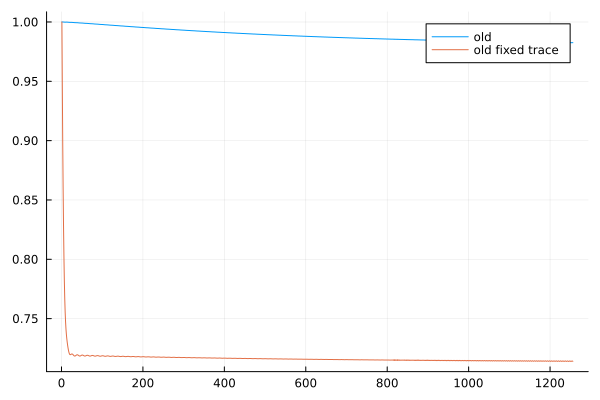

In [20]:
f = LiPoSID.fidelity_series(basis, ρᵍ, ρᵍₛᵢ)
fᶠⁱˣ = LiPoSID.fidelity_series(basis, ρᵍ, ρᵍₛᵢᶠⁱˣ)
fⁿ = LiPoSID.fidelity_series(basis, ρᵍ, ρᵍₙ)
fⁿᶠⁱˣ = LiPoSID.fidelity_series(basis, ρᵍ, ρᵍₙᶠⁱˣ)

plot(f, label = "old")
plot!(fᶠⁱˣ, label ="old fixed trace")

In [21]:
f = LiPoSID.fidelity_series(basis, ρˣ, ρˣₛᵢ)
fᶠⁱˣ = LiPoSID.fidelity_series(basis, ρˣ, ρˣₛᵢᶠⁱˣ)
fⁿ = LiPoSID.fidelity_series(basis, ρˣ, ρˣₙ)
fⁿᶠⁱˣ = LiPoSID.fidelity_series(basis, ρˣ, ρˣₙᶠⁱˣ);

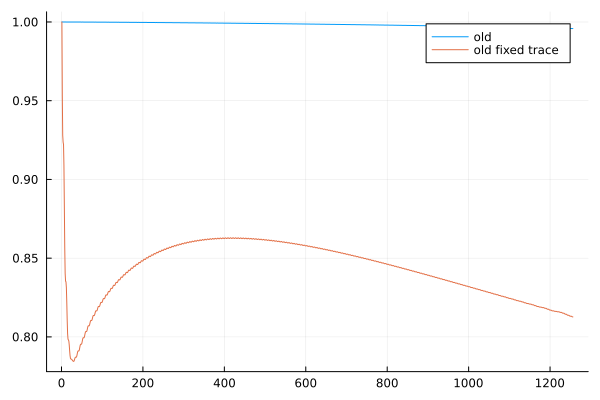

In [22]:
plot(f, label = "old")
plot!(fᶠⁱˣ, label ="old fixed trace")

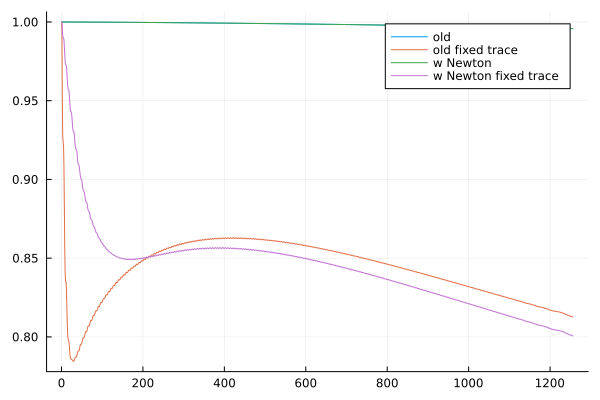

In [23]:
plot(f, label = "old")
plot!(fᶠⁱˣ, label ="old fixed trace")
plot!(fⁿ, label = "w Newton")
plot!(fⁿᶠⁱˣ, label = "w Newton fixed trace")

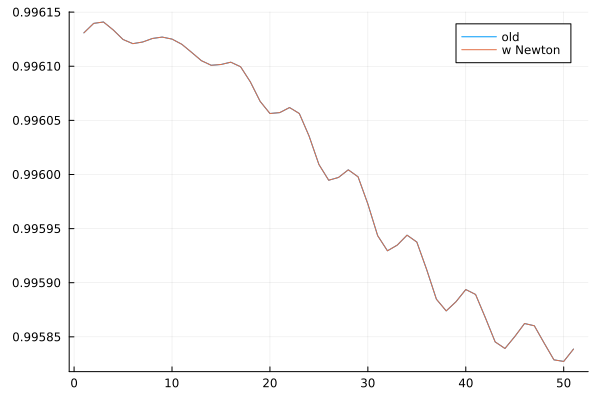

In [24]:
plot(f[end-50:end], label = "old")
plot!(fⁿ[end-50:end], label = "w Newton")

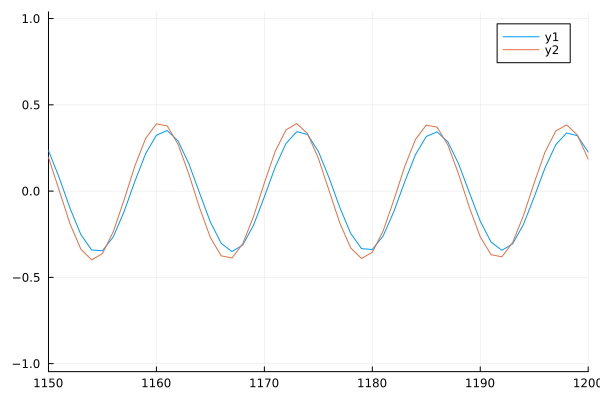

In [25]:
plot(bˣₙ[1,:]) 
plot!(bˣ[1,:]) 
xlims!(1150, 1200)

In [26]:
using StatsPlots

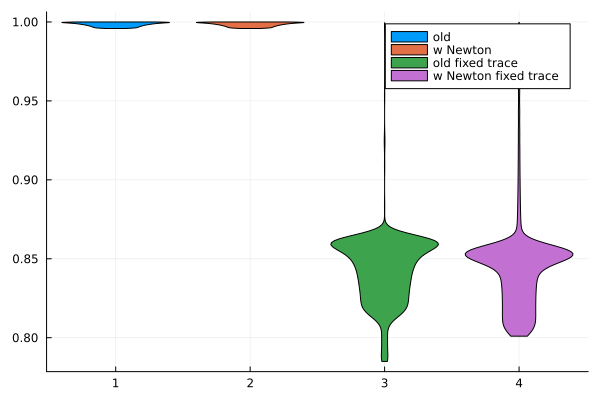

In [27]:
violin([f, fⁿ, fᶠⁱˣ, fⁿᶠⁱˣ], labels = ["old" "w Newton" "old fixed trace" "w Newton fixed trace"])

In [28]:
test_files = ["State_D"*string(n) for n=1:20];

In [32]:
Hˢⁱᵈ
Lˢⁱᵈ

2×2 Matrix{Polynomial{true, ComplexF64}}:
 (2.38517-1.21638im)      (0.213542+0.199173im)
 (0.0451408+0.0479406im)  (2.38522-1.21633im)

In [29]:
F = []
Fⁿ = []
Fᶠⁱˣ = []
Fⁿᶠⁱˣ = []

for df in test_files # loop over initial states

    print(df*" ")

    # Read EXACT data series of Kurt data

    ρ, t = LiPoSID.get_rho_series(data_dir*df*"_2CUT_data.h5", string(γᵗˣᵗ))

    ρ = convert(Vector{Matrix{ComplexF64}}, ρ)
    t = convert(Vector{Float64}, t)

    # Restore data series POP identified

    ρ₀ = ρ[1]
    ρˢⁱᵈ = Lindblad_time_evolution(basis, ρ₀, t, Hˢⁱᵈ, [Lˢⁱᵈ])
    ρᶠⁱˣ = Lindblad_time_evolution(basis, ρ₀, t, Hᶠⁱˣ, [Lᶠⁱˣ])
    ρⁿ = Lindblad_time_evolution(basis, ρ₀, t, Hⁿ, [Lⁿ])
    ρⁿᶠⁱˣ = Lindblad_time_evolution(basis, ρ₀, t, Hⁿᶠⁱˣ, [Lⁿᶠⁱˣ])


    # Calculating fidelity series
    F = hcat(LiPoSID.fidelity_series(basis, ρ, ρˢⁱᵈ))
    Fⁿ = hcat(LiPoSID.fidelity_series(basis, ρ, ρⁿ ))
    Fᶠⁱˣ = hcat(LiPoSID.fidelity_series(basis, ρ, ρᶠⁱˣ))
    Fⁿᶠⁱˣ = hcat(LiPoSID.fidelity_series(basis, ρ, ρⁿᶠⁱˣ))


end # of files (initial states) df loop  

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to 

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to 

State_D1 State_D2 State_D3 State_D4 State_D5 State_D6 State_D7 State_D8 State_D9 State_D10 State_D11 State_D12 State_D13 State_D14 State_D15 State_D16 State_D17 State_D18 State_D19 State_D20 

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to 

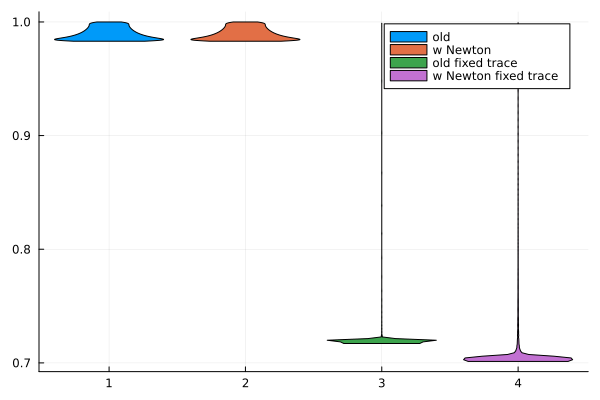

In [30]:
violin([F, Fⁿ, Fᶠⁱˣ, Fⁿᶠⁱˣ], labels = ["old" "w Newton" "old fixed trace" "w Newton fixed trace"])